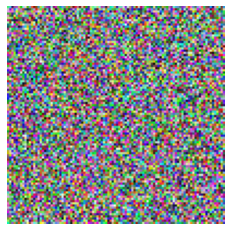

In [1]:
###################################################################################################
import numpy as np
import matplotlib.pyplot as plt

test_img = np.random.rand(100, 100, 3)  # Create a random 100x100 RGB image
plt.imshow(test_img)
plt.axis('off')
plt.show()

In [2]:
###################################################################################################
import torch 
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from PIL import Image
import torchvision


In [3]:
##########################################################################################################################
class PressureSensorDataset():
    """
    This custom dataset class takes root directory and train flag,
    and returns dataset training dataset if train flag is true
    else it returns validation dataset.
    """

    def __init__(self, data_root, train=True, image_shape=None, transform=None):
        """
                init method of the class.

                 Parameters:

                 data_root (string): path of root directory.

                 train (boolean): True for training dataset and False for test dataset.

                 image_shape (int or tuple or list): [optional] int or tuple or list. Defaut is None.
                                                     If it is not None image will resize to the given shape.

                 transform (method): method that will take PIL image and transform it.

                """

        # set image_resize attribute
        if image_shape is not None:
            if isinstance(image_shape, int):
                self.image_shape = (image_shape, image_shape)

            elif isinstance(image_shape, tuple) or isinstance(image_shape, list):
                assert len(image_shape) == 1 or len(image_shape) == 2, 'Invalid image_shape tuple size'
                if len(image_shape) == 1:
                    self.image_shape = (image_shape[0], image_shape[0])
                else:
                    self.image_shape = image_shape
            else:
                raise NotImplementedError

        else:
            self.image_shape = image_shape

        # set transform attribute
        self.transform = transform

        num_classes = 10

        # initialize the data dictionary
        self.data_dict = {
            'image_path': [],
            'label': []
        }

        # training data path, this will be used as data root if train = True
        if train:
            img_dir = os.path.join(data_root, 'Demo_Training')

        # validation data path, this will be used as data root if train = False
        else:
            img_dir = os.path.join(data_root, 'Demo_Training')

        for img in os.listdir(img_dir):
            if img.endswith(".jpg") or img.endswith(".png"):
                img_path = os.path.join(img_dir, img)
                self.data_dict['image_path'].append(img_path)
                self.data_dict['label'].append(1)
    

    def __len__(self):
        """
        return length of the dataset
        """
        return len(self.data_dict['label'])

    def __getitem__(self, idx):
        """
        For given index, return images with resize and preprocessing.
        """

        image = Image.open(self.data_dict['image_path'][idx]).convert("RGB")

        if self.image_shape is not None:
            image = F.resize(image, self.image_shape)

        if self.transform is not None:
            image = self.transform(image)

        target = self.data_dict['label'][idx]

        return image, target


    

In [4]:
###################################################################################################
data_root = r'C:\Users\sanke\PycharmProjects\Pressure-to-Posture\Dataset\Pressure_Image_Dataset\Pressure_Sensor_Data'
#data_root = r'PycharmProjects\Pressure-to-Posture\Dataset\Pressure_Image_Dataset\Pressure_Sensor_Data'

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
    ])

test_dataset =  PressureSensorDataset(data_root, train=True, image_shape=None, transform=preprocess)



In [5]:
class PressureSensorDataset():
    """
    This custom dataset class takes root directory and train flag,
    and returns dataset training dataset if train flag is true
    else it returns validation dataset.
    """

    def __init__(self, data_root, train=True, image_shape=None, transform=None):
        """
                init method of the class.

                 Parameters:

                 data_root (string): path of root directory.

                 train (boolean): True for training dataset and False for test dataset.

                 image_shape (int or tuple or list): [optional] int or tuple or list. Defaut is None.
                                                     If it is not None image will resize to the given shape.

                 transform (method): method that will take PIL image and transform it.

                """

        # set image_resize attribute
        if image_shape is not None:
            if isinstance(image_shape, int):
                self.image_shape = (image_shape, image_shape)

            elif isinstance(image_shape, tuple) or isinstance(image_shape, list):
                assert len(image_shape) == 1 or len(image_shape) == 2, 'Invalid image_shape tuple size'
                if len(image_shape) == 1:
                    self.image_shape = (image_shape[0], image_shape[0])
                else:
                    self.image_shape = image_shape
            else:
                raise NotImplementedError

        else:
            self.image_shape = image_shape

        # set transform attribute
        self.transform = transform

        num_classes = 10

        # initialize the data dictionary
        self.data_dict = {
            'image_path': [],
            'label': []
        }

        # training data path, this will be used as data root if train = True
        if train:
            img_dir = os.path.join(data_root, 'Demo_Training')

        # validation data path, this will be used as data root if train = False
        else:
            img_dir = os.path.join(data_root, 'Demo_Training')

        for img in os.listdir(img_dir):
            if img.endswith(".jpg") or img.endswith(".png"):
                img_path = os.path.join(img_dir, img)
                self.data_dict['image_path'].append(img_path)
                self.data_dict['label'].append(1)
                
                
                
        print("Total image paths are : " ,len(self.data_dict['image_path']))
        

    def __len__(self):
        """
        return length of the dataset
        """
        return len(self.data_dict['label'])

    def __getitem__(self, idx):
        """
        For given index, return images with resize and preprocessing.
        """

        image = Image.open(self.data_dict['image_path'][idx]).convert("RGB")
        
         # Print size of the PIL image before transformation
        print("Original image size:", image.size)

        if self.image_shape is not None:
            image = F.resize(image, self.image_shape)
            print("Image size after resizing:", image.size)

        if self.transform is not None:
            image = self.transform(image)
            print("Tensor shape after transformation:", image.shape)

        target = self.data_dict['label'][idx]

        return image, target


    

In [6]:
test_dataset =  PressureSensorDataset(data_root, train=True, image_shape=None, transform=preprocess)

Total image paths are :  30


In [7]:
# Access a single item from the dataset to trigger the print statements in __getitem__
for i in range (1):
    image, label = test_dataset[i]  # Accessing the first item, for example

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])


In [8]:
###################################################################################################
# dataloader with dataset
test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=15,
        shuffle=True,
        num_workers=0
    )

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

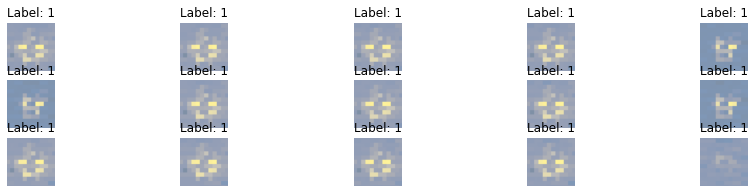

In [9]:
###################################################################################################
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

# Assuming 'test_loader' is your DataLoader
for images, labels in test_loader:
    plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

    # Loop to display the first 5 images
    for i in range(15):  # Iterate over the first five images
        image = images[i] / 2 + 0.5  # Unnormalize
        npimg = image.numpy()  # Convert tensor to numpy array
        rgb_img = np.transpose(npimg, (1, 2, 0))  # Reorder the channels

        plt.subplot(3, 5, i + 1)  # Create a subplot for each image
        plt.imshow(rgb_img)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')

    plt.show()
    break  # Process only the first batch


Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

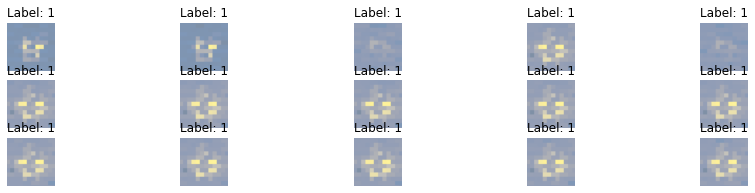

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

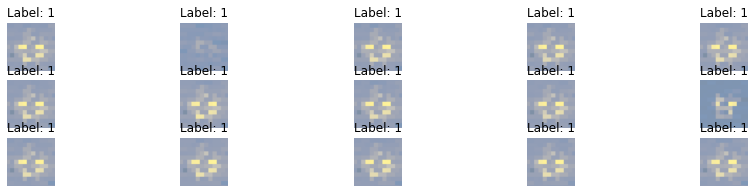

In [10]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

# Assuming 'test_loader' is your DataLoader
batch_counter = 0  # Initialize a counter for the number of batches

for images, labels in test_loader:
    plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

    # Loop to display the images in the batch
    for i in range(len(images)):  # Iterate over all images in the batch
        image = images[i] / 2 + 0.5  # Unnormalize
        npimg = image.numpy()  # Convert tensor to numpy array
        rgb_img = np.transpose(npimg, (1, 2, 0))  # Reorder the channels

        plt.subplot(3, 5, i + 1)  # Create a subplot for each image
        plt.imshow(rgb_img)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')

    plt.show()
    
    batch_counter += 1  # Increment the batch counter
    if batch_counter == 10:  # Check if two batches have been processed
        break


In [11]:
###################################################################################################
import torch
import torch.nn.functional as F

def linear_beta_schedule(timesteps, start=0.0001, end=0.02):
    
    return torch.linspace(start, end, timesteps)

def get_index_from_list(vals, t, x_shape):
    """ 
    Returns a specific index t of a passed list of values vals
    while considering the batch dimension.
    """
    batch_size = t.shape[0]
    out = vals.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)

def forward_diffusion_sample(x_0, t, device="cpu"):
    """ 
    Takes an image and a timestep as input and 
    returns the noisy version of it
    """
    noise = torch.randn_like(x_0)
    sqrt_alphas_cumprod_t = get_index_from_list(sqrt_alphas_cumprod, t, x_0.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x_0.shape
    )
    
    
    sqrt_alphas_cumprod_t_expanded = sqrt_alphas_cumprod_t.expand_as(x_0)
    sqrt_one_minus_alphas_cumprod_t_expanded = sqrt_one_minus_alphas_cumprod_t.expand_as(noise)

    
    
    
    print("sqrt_alphas_cumprod_t shape:", sqrt_alphas_cumprod_t.shape)
    print("x_0 shape:", x_0.shape)
    print("sqrt_one_minus_alphas_cumprod_t shape:", sqrt_one_minus_alphas_cumprod_t.shape)
    print("noise shape:", noise.shape)

    
    # mean + variance
    return sqrt_alphas_cumprod_t.to(device) * x_0.to(device) \
    + sqrt_one_minus_alphas_cumprod_t.to(device) * noise.to(device), noise.to(device)


# Define beta schedule
T = 300
betas = linear_beta_schedule(timesteps=T)

# Pre-calculate different terms for closed form
alphas = 1. - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)

In [12]:
###################################################################################################
def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :] 
    plt.imshow(reverse_transforms(image))

In [ ]:
# Simulate forward diffusion
#image = next(iter(test_loader))[0][11]

#image = image / 2 + 0.5  # Unnormalize
#npimg = image.numpy()  # Convert tensor to numpy array
#rgb_img = np.transpose(npimg, (1, 2, 0))  # Reorder the channels

# Create and display the image
#plt.imshow(rgb_img)
#plt.title(f"Label: {labels}")
#plt.axis('off')
#plt.show()


Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

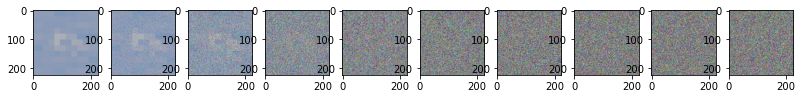

In [13]:
###################################################################################################
image = next(iter(test_loader))[0]
plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(T/num_images)


for idx in range(0, T, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = forward_diffusion_sample(image, t)
    show_tensor_image(img)

In [14]:
###################################################################################################
from torch import nn
import math


class Block(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super().__init__()
        self.time_mlp =  nn.Linear(time_emb_dim, out_ch)
        if up:
            self.conv1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1)
            self.transform = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1)
        else:
            self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
            self.transform = nn.Conv2d(out_ch, out_ch, 4, 2, 1)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bnorm1 = nn.BatchNorm2d(out_ch)
        self.bnorm2 = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()
        
    def forward(self, x, t, ):
        # First Conv
        h = self.bnorm1(self.relu(self.conv1(x)))
        # Time embedding
        time_emb = self.relu(self.time_mlp(t))
        # Extend last 2 dimensions
        time_emb = time_emb[(..., ) + (None, ) * 2]
        # Add time channel
        h = h + time_emb
        # Second Conv
        h = self.bnorm2(self.relu(self.conv2(h)))
        # Down or Upsample
        return self.transform(h)


class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        # TODO: Double check the ordering here
        return embeddings


class SimpleUnet(nn.Module):
    """
    A simplified variant of the Unet architecture.
    """
    def __init__(self):
        super().__init__()
        image_channels = 3
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = 3 
        time_emb_dim = 32

        # Time embedding
        self.time_mlp = nn.Sequential(
                SinusoidalPositionEmbeddings(time_emb_dim),
                nn.Linear(time_emb_dim, time_emb_dim),
                nn.ReLU()
            )
        
        # Initial projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        # Downsample
        self.downs = nn.ModuleList([Block(down_channels[i], down_channels[i+1], \
                                    time_emb_dim) \
                    for i in range(len(down_channels)-1)])
        # Upsample
        self.ups = nn.ModuleList([Block(up_channels[i], up_channels[i+1], \
                                        time_emb_dim, up=True) \
                    for i in range(len(up_channels)-1)])
        
        # Edit: Corrected a bug found by Jakub C (see YouTube comment)
        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embedd time
        t = self.time_mlp(timestep)
        # Initial conv
        x = self.conv0(x)
        # Unet
        residual_inputs = []
        for down in self.downs:
            x = down(x, t)
            residual_inputs.append(x)
        for up in self.ups:
            residual_x = residual_inputs.pop()
            # Add residual x as additional channels
            x = torch.cat((x, residual_x), dim=1)           
            x = up(x, t)
        return self.output(x)

model = SimpleUnet()
print("Num params: ", sum(p.numel() for p in model.parameters()))
model

Num params:  62438883


SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

In [15]:
###################################################################################################
def get_loss(model, x_0, t):
    x_noisy, noise = forward_diffusion_sample(x_0, t, device)
    noise_pred = model(x_noisy, t)
    return F.l1_loss(noise, noise_pred)

In [16]:
###################################################################################################
@torch.no_grad()
def sample_timestep(x, t):
    """
    Calls the model to predict the noise in the image and returns 
    the denoised image. 
    Applies noise to this image, if we are not in the last step yet.
    """
    betas_t = get_index_from_list(betas, t, x.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(
        sqrt_one_minus_alphas_cumprod, t, x.shape
    )
    sqrt_recip_alphas_t = get_index_from_list(sqrt_recip_alphas, t, x.shape)
    
    # Call model (current image - noise prediction)
    model_mean = sqrt_recip_alphas_t * (
        x - betas_t * model(x, t) / sqrt_one_minus_alphas_cumprod_t
    )
    posterior_variance_t = get_index_from_list(posterior_variance, t, x.shape)
    
    if t == 0:
        # As pointed out by Luis Pereira (see YouTube comment)
        # The t's are offset from the t's in the paper
        return model_mean
    else:
        noise = torch.randn_like(x)
        return model_mean + torch.sqrt(posterior_variance_t) * noise 

@torch.no_grad()
def sample_plot_image():
    # Sample noise
    img_size = IMG_SIZE
    img = torch.randn((1, 3, img_size, img_size), device=device)
    plt.figure(figsize=(15,15))
    plt.axis('off')
    num_images = 10
    stepsize = int(T/num_images)

    for i in range(0,T)[::-1]:
        t = torch.full((1,), i, device=device, dtype=torch.long)
        img = sample_timestep(img, t)
        # Edit: This is to maintain the natural range of the distribution
        img = torch.clamp(img, -1.0, 1.0)
        if i % stepsize == 0:
            plt.subplot(1, num_images, int(i/stepsize)+1)
            show_tensor_image(img.detach().cpu())
    plt.show()            

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

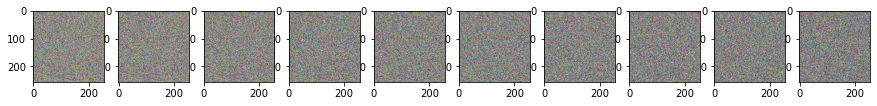

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

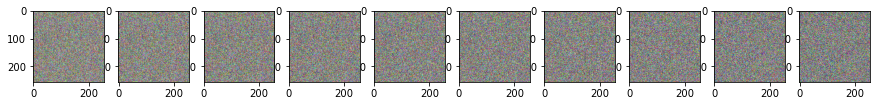

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

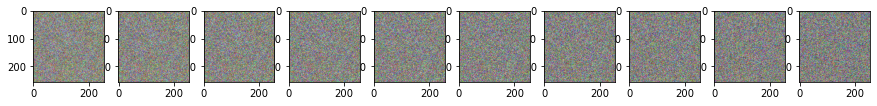

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

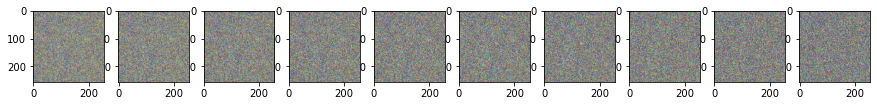

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

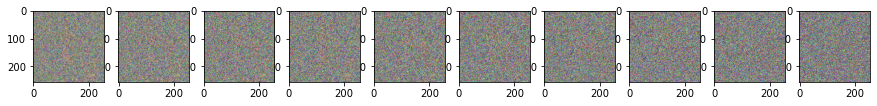

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

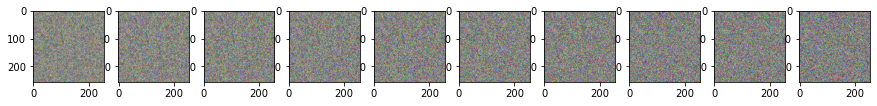

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

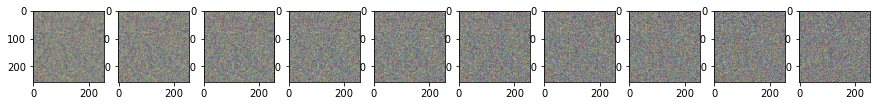

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

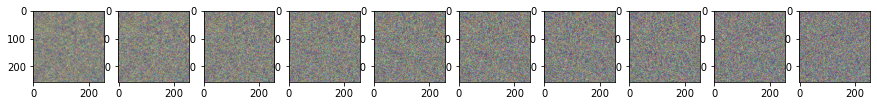

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

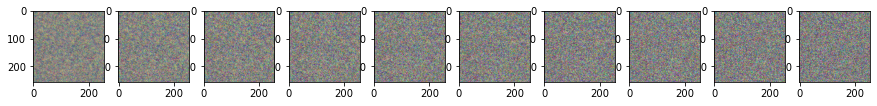

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

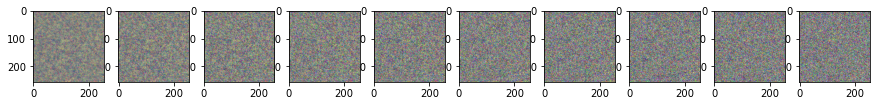

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

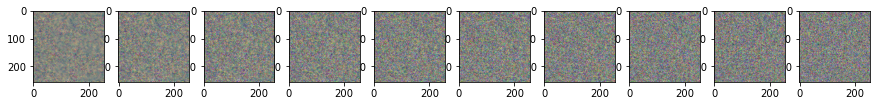

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

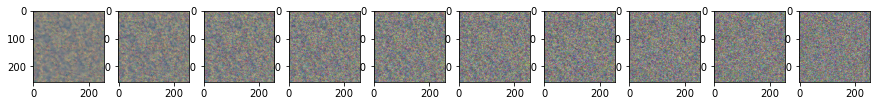

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

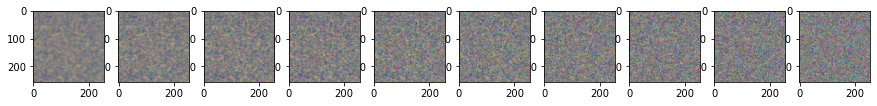

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

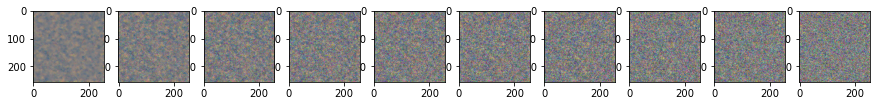

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

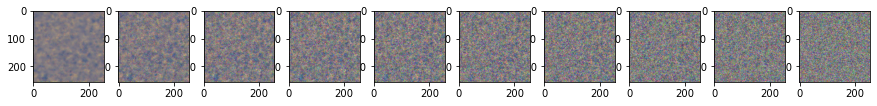

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

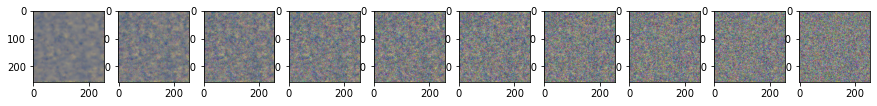

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

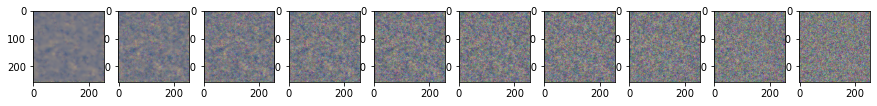

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

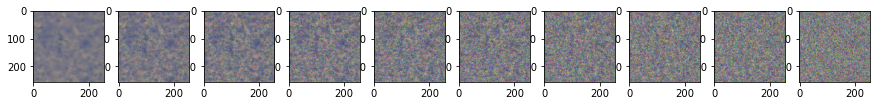

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

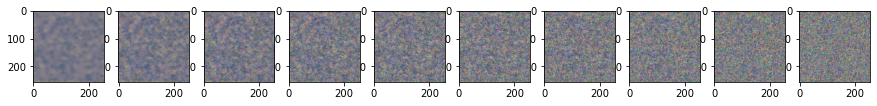

Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: torch.Size([3, 224, 224])
Original image size: (496, 268)
Tensor shape after transformation: tor

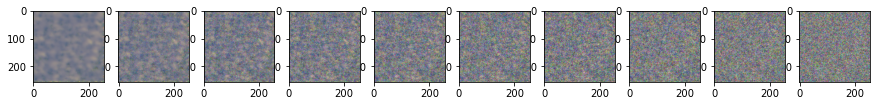

In [19]:
###################################################################################################
from torch.optim import Adam
batch_size = 15
IMG_SIZE = 256

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 10 # Try more!

for epoch in range(epochs):
    for step, batch in enumerate(test_loader):
      optimizer.zero_grad()

      t = torch.randint(0, T, (batch_size,), device=device).long()
      loss = get_loss(model, batch[0], t)
      loss.backward()
      optimizer.step()
      print(f"Epoch {epoch} | step {step:03d} Loss: {loss.item()} ")
      sample_plot_image()
      #if epoch % 5 == 0 and step == 0:
      #  print(f"Epoch {epoch} | step {step:03d} Loss: {loss.item()} ")
        #sample_plot_image()

In [ ]:
### Inference and Qualitative Images

In [ ]:
################################################
@torch.no_grad()
def p_sample(model, x, t, t_index):
    betas_t = extract(betas, t, x.shape)
    sqrt_one_minus_alphas_cumprod_t = extract(
        sqrt_one_minus_alphas_cumprod, t, x.shape
    )
    sqrt_recip_alphas_t = extract(sqrt_recip_alphas, t, x.shape)
    
    # Equation 11 in the paper
    # Use our model (noise predictor) to predict the mean
    model_mean = sqrt_recip_alphas_t * (
        x - betas_t * model(x, t) / sqrt_one_minus_alphas_cumprod_t
    )

    if t_index == 0:
        return model_mean
    else:
        posterior_variance_t = extract(posterior_variance, t, x.shape)
        noise = torch.randn_like(x)
        # Algorithm 2 line 4:
        return model_mean + torch.sqrt(posterior_variance_t) * noise 

# Algorithm 2 but save all images:
@torch.no_grad()
def p_sample_loop(model, shape):
    device = next(model.parameters()).device

    b = shape[0]
    # start from pure noise (for each example in the batch)
    img = torch.randn(shape, device=device)
    imgs = []
    
    for i in tqdm(reversed(range(0, timesteps)), desc='sampling loop time step', total=timesteps):
        img = p_sample(model, img, torch.full((b,), i, device=device, dtype=torch.long), i)
        imgs.append(img.cpu().numpy())
    return imgs

@torch.no_grad()
def sample(model, image_size, batch_size=16, channels=3):
    return p_sample_loop(model, shape=(batch_size, channels, image_size, image_size))

In [ ]:
# sample 64 images
samples = sample(model, image_size=image_size, batch_size=64, channels=channels)

In [ ]:
# show a random one
random_index = 5
plt.imshow(samples[-1][random_index].reshape(image_size, image_size, channels), cmap="gray")

In [ ]:
######### Animation
import matplotlib.animation as animation

random_index = 53

fig = plt.figure()
ims = []
for i in range(timesteps):
    im = plt.imshow(samples[i][random_index].reshape(image_size, image_size, channels), cmap="gray", animated=True)
    ims.append([im])

animate = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
animate.save('diffusion.gif')
plt.show()